<a href="https://colab.research.google.com/github/Abdallahyx/ResNet50-From-Scratch/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Packages**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

## **Download The Dataset**


In [2]:
# upload kaggle JSON file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

In [ ]:
!unzip cat-and-dog.zip

## **Data Pre-processing**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

traindir = '/content/training_set/training_set'
testdir = '/content/test_set/test_set'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        traindir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size = 80,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        testdir,
        target_size=(150, 150),
        batch_size = 80,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## **Import ResNet50 Model**

In [14]:
import resnet50 as RN50 

model = RN50.ResNet50(input_shape = (150,150,3), classes = 2)

In [ ]:
model.summary()

In [16]:
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics=['accuracy'])

### **Train The Model**

In [ ]:
history = model.fit(train_generator, epochs = 20, validation_data = test_generator)  

### **Plot The Accuracy**

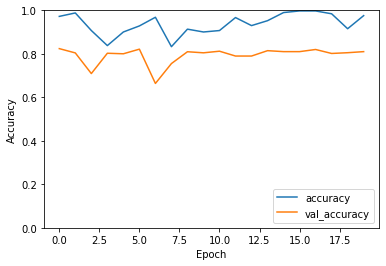

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

### **Testing The Model**

In [37]:
predictions = {0 : 'cat', 1 : 'dog'}

cat


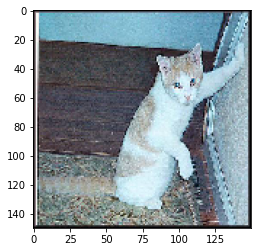

In [46]:
from keras.preprocessing.image import load_img, img_to_array

image_ = load_img('/content/preds/_0_5893219.png', target_size=(150, 150))

image = img_to_array(image_)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = image/255.0

pred = model.predict(image)
plt.imshow(image_)
print(predictions[np.argmax(pred)])